In [1]:
# Code for Histogram Equalization
# By: Danish Ahmed Mehmuda
# U19EC111

import sys
import cv2 as cv
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt

import imageio
from PIL import Image

In [2]:
img = cv.imread(sys.path[0]+'/images/1.jfif')

# cv.imshow('Original', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
grayScaleImg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow('Gray Scaled Image', grayScaleImg)
cv.waitKey(0)
cv.destroyAllWindows()

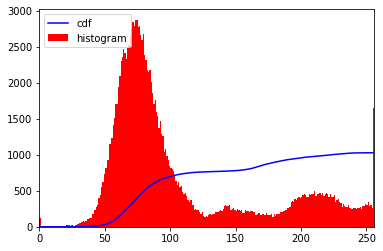

In [4]:
hist, bins = np.histogram(grayScaleImg.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

In [5]:
equ = cv.equalizeHist(grayScaleImg)

# cv.imshow('equ.png', equ)
cv.waitKey(0)
cv.destroyAllWindows()

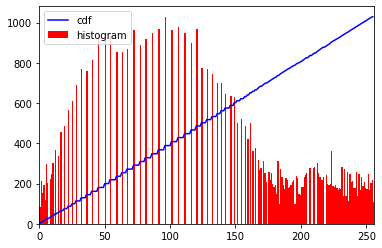

In [6]:
hist, bins = np.histogram(equ.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(equ.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

In [7]:
# Read the Image and convert to Grayscale
img = Image.open('./images/1.jfif').convert('L')
img.save('./images/grayscale.png')

In [8]:
# Function to get the Equalized Image, Original Image's Histogram
# and Equalized Image's Histogram
def hist_equalize(grayImg):
		if len(grayImg.shape) != 2:
				return 'Not a Grayscale Image'
		
		img = grayImg * 255

		histOrig, bins = np.histogram(img.flatten(), 256, [0, 255])

		cdf = histOrig.cumsum()

		cdf_m = np.ma.masked_equal(cdf, 0)

		cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())

		cdf = np.ma.filled(cdf_m, 0)

		imgEq = cdf[img.astype('uint8')]
		
		histEq, bins = np.histogram(imgEq.flatten(), 256, [0, 256])
		
		return imgEq, histEq

In [9]:
grayImg = imageio.imread('./images/grayscale.png')

In [10]:
# Perform Histogram Equalization and get the Equalized Image and its Histogram
imgEq, histEq = hist_equalize(grayImg)

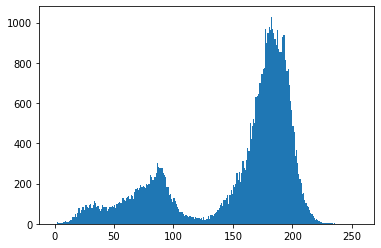

In [11]:
# Plot the Histogram of Original Image
mGrayImg = grayImg * 255
plt.hist(mGrayImg.flatten(), 256, [0, 256])
plt.show()

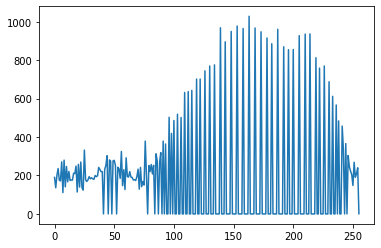

In [12]:
# Plot the Histogram of Equalized Image
plt.plot(histEq)

In [13]:
# Save the output Image
output = Image.fromarray(imgEq.astype('uint8'))
output.save('HistEqImg.png')